# Overview

<b>Diabetes</b> is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.

#### Symptoms:

- feeling very thirsty
- needing to urinate more often than usual
- blurred vision
- feeling tired
- losing weight unintentionally

#### Effects:

- <b>Hyperglycaemia</b>, also called raised blood glucose or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.
- People with diabetes have a higher risk of health problems including heart attack, stroke and kidney failure.
- Diabetes can cause permanent vision loss by damaging blood vessels in the eyes.
- Many people with diabetes develop problems with their feet from nerve damage and poor blood flow. This can cause foot ulcers and may lead to amputation.

<i>Reference : https://www.who.int/news-room/fact-sheets/detail/diabetes#:~:text=Overview,hormone%20that%20regulates%20blood%20glucose</i>

# Objective:

The objective of this project is to build a machine learning model which will predict whether a patient has diabetes or not based on some diagonostic measurements such as glucose, blood pressure, insulin level, age and so on.

# About Dataset

#### Pima Indians Diabetes Database

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The dataset consists of several medical predictor variables and one target variable, Outcome.
- Predictor variables include:
    - <b>Pregnancies</b> : No. of times pregnant
    - <b>Glucose</b> : Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    - <b>BloodPressure</b> : Diastolic blood pressure (mm Hg)
    - <b>SkinThickness</b> : Triceps skin fold thickness (mm)
    - <b>Insulin</b> : 2-Hour serum insulin (muU/ml)
    - <b>BMI</b> : Body Mass Index (weight in kg / (height in m)^2)
    - <b>DiabetesPedigreeFunction</b>: Diabetes pedigree function
    - <b>Age</b> : Age in years
- Outcome : Class variable (0 => non-diabetic & 1 => diabetic)
- Total no. of observations : 768
- Total no. of variables : 9

<i>Dataset URL : https://www.kaggle.com/datasets/uciml/Pima-indians-diabetes-database</i>

# Importing the Dependencies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [70]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [71]:
# printing the first 5 rows  of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [72]:
# number of rows and columns
diabetes_dataset.shape

(768, 9)

In [73]:
# getting the statistical measures of the data
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [74]:
# data-type of features
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [75]:
# checking for null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
# checking for duplicate values
diabetes_dataset[diabetes_dataset.duplicated()]

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

In [77]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 => non-diabetic

1 => diabetic

In [78]:
diabetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

# Data Visualization

### Outcome countplot

<Axes: xlabel='Outcome', ylabel='count'>

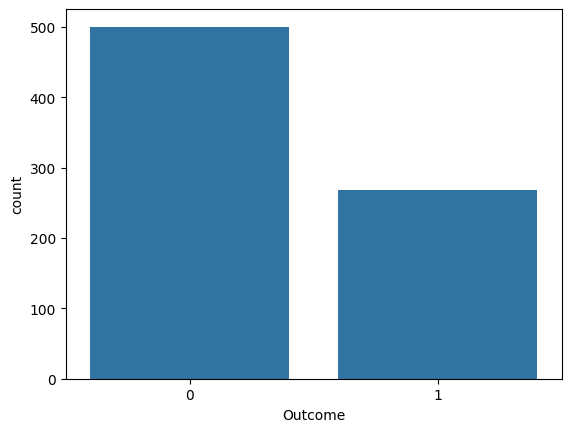

In [79]:
sns.countplot(x='Outcome',data=diabetes_dataset)

### Histogram for each feature

In [80]:
df = diabetes_dataset.drop(columns='Outcome',axis=1)

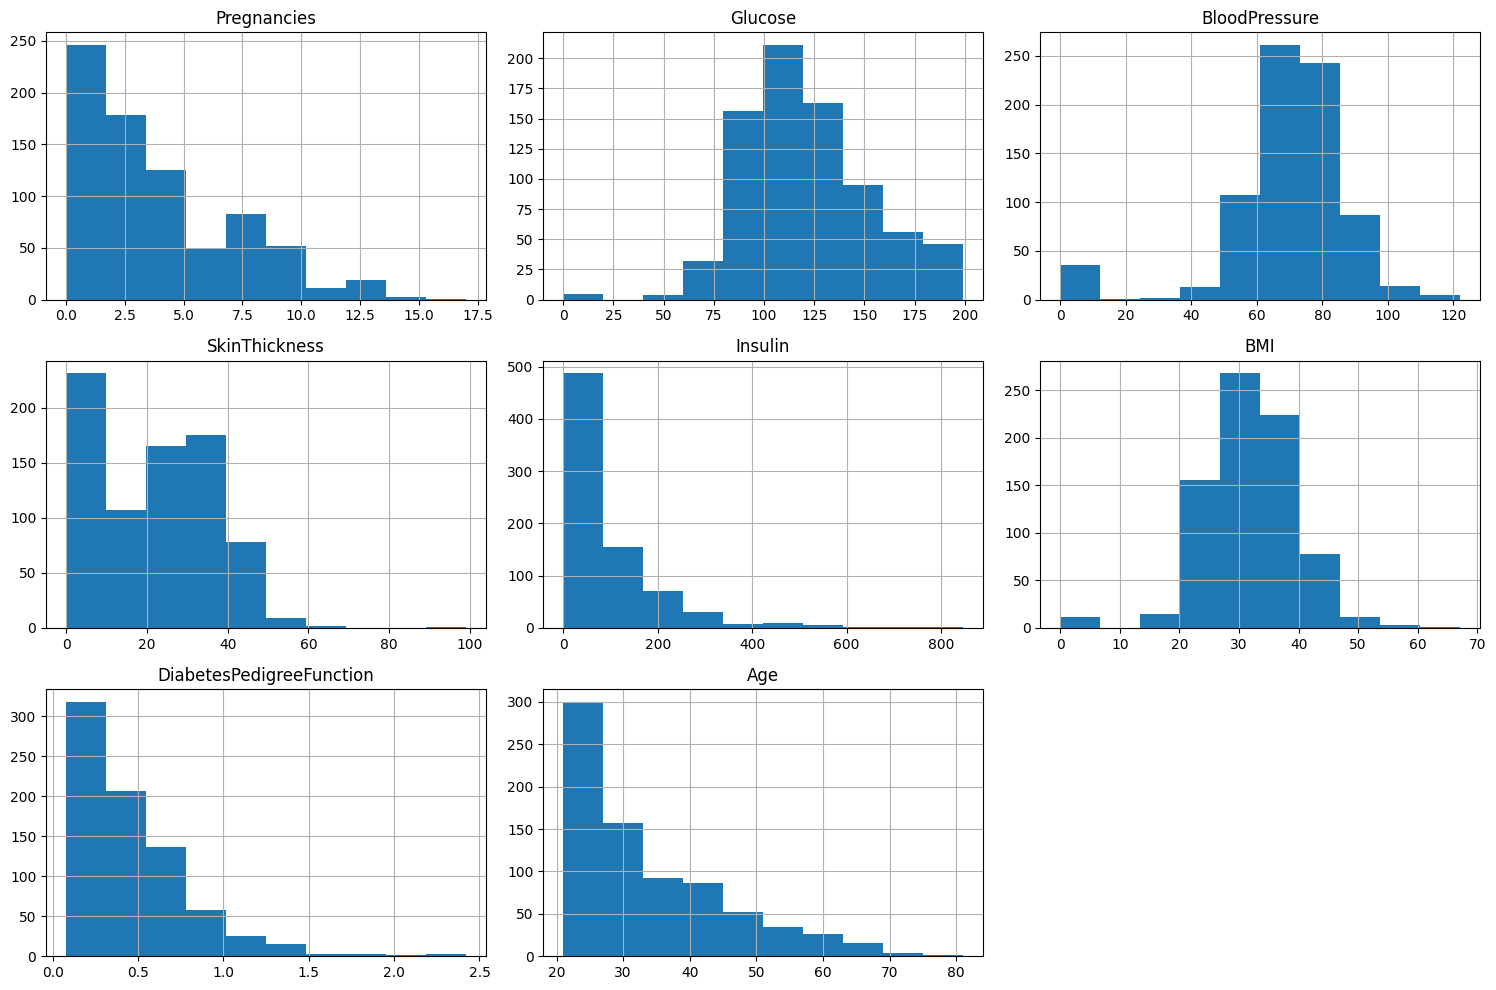

In [81]:
df.hist(bins=10, figsize=(15,10))
plt.tight_layout()
plt.show()

### Scatter Plot

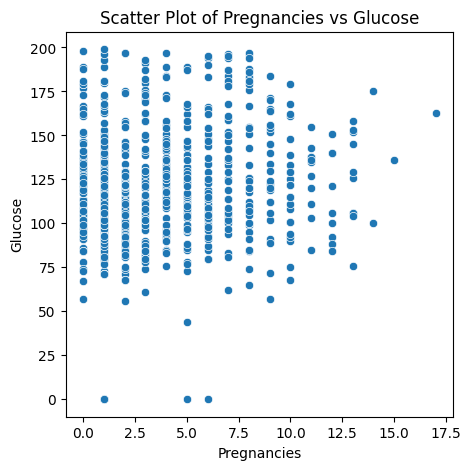

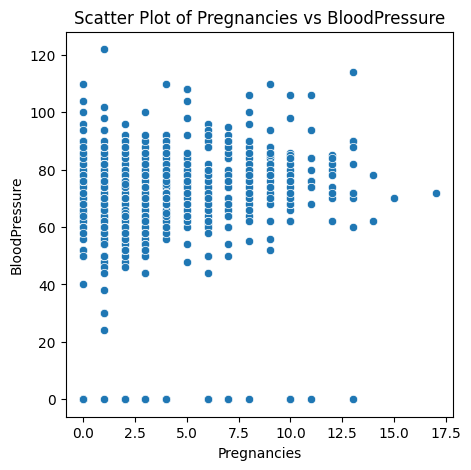

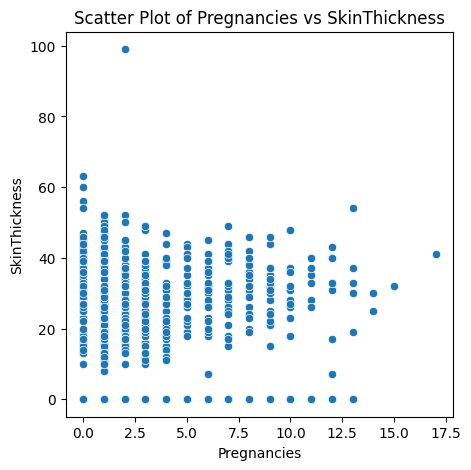

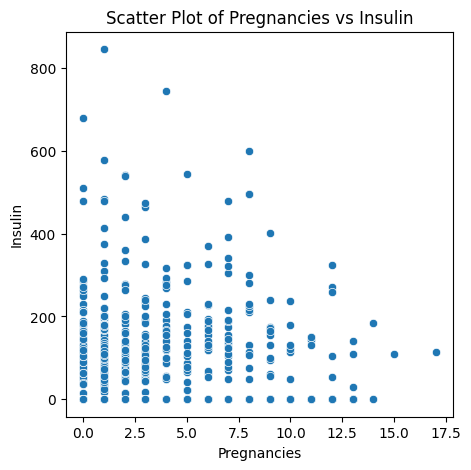

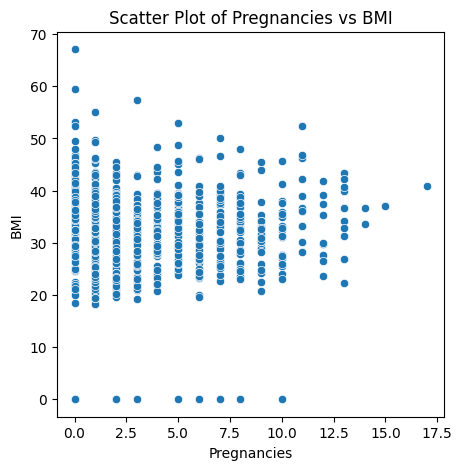

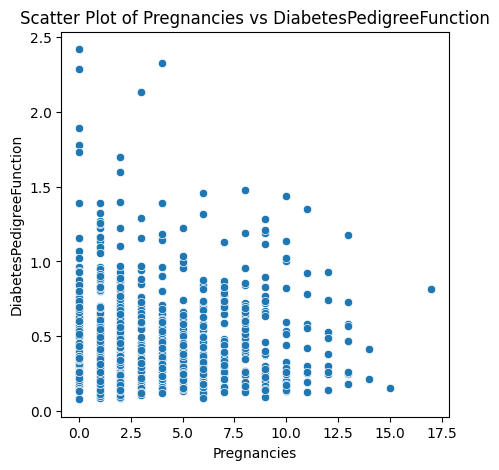

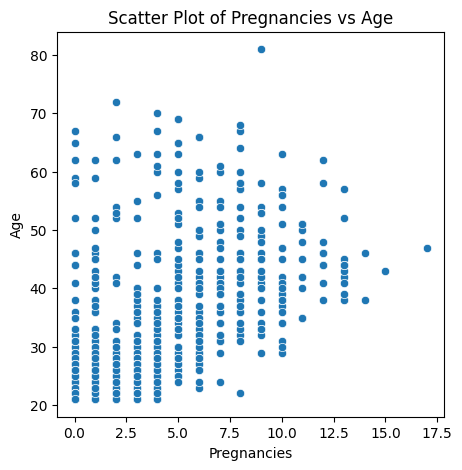

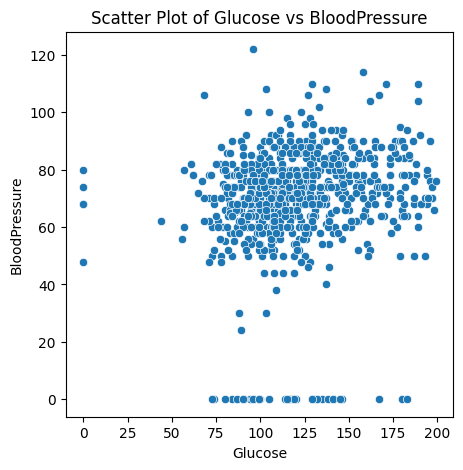

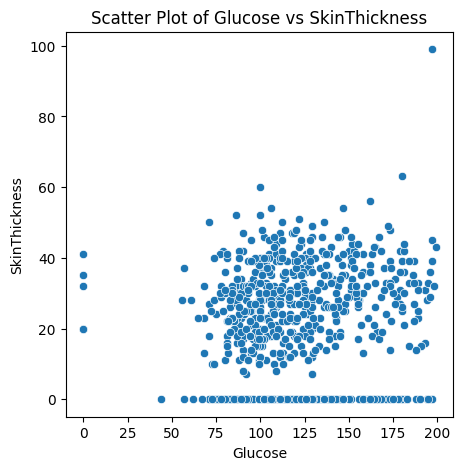

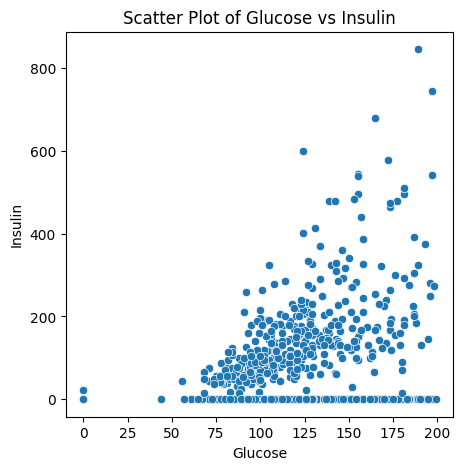

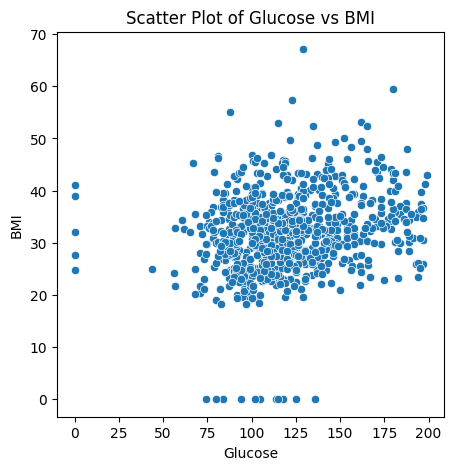

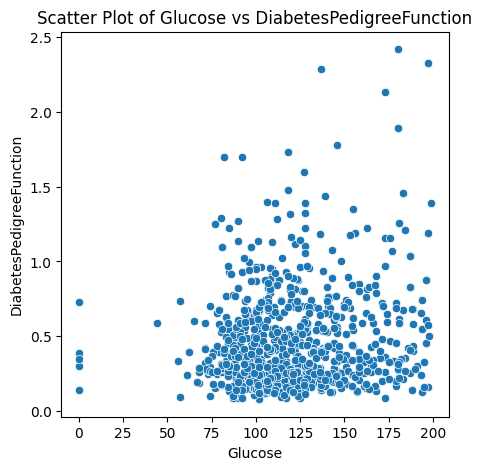

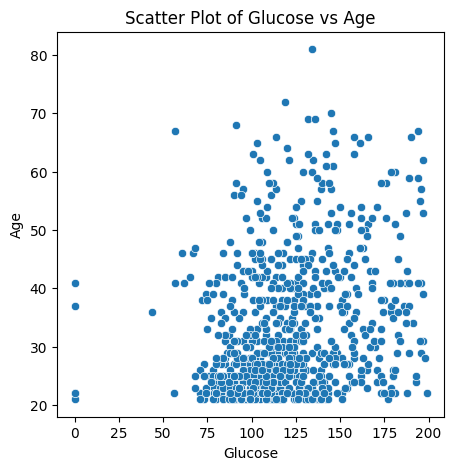

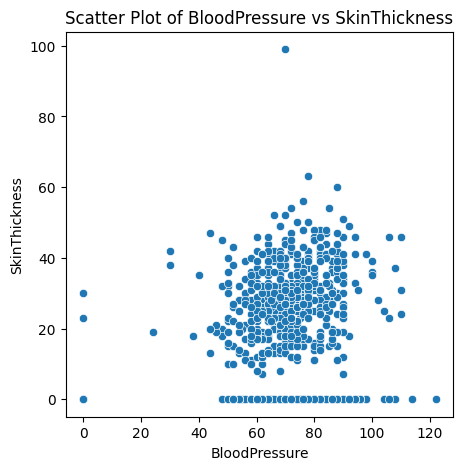

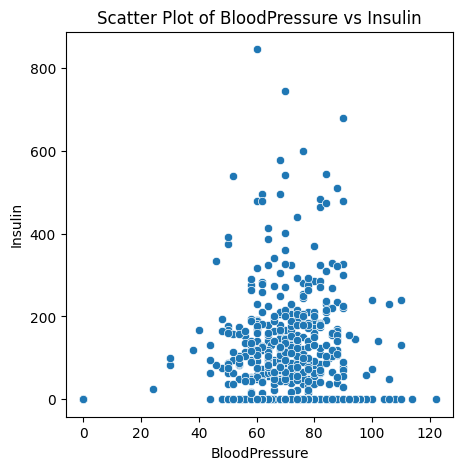

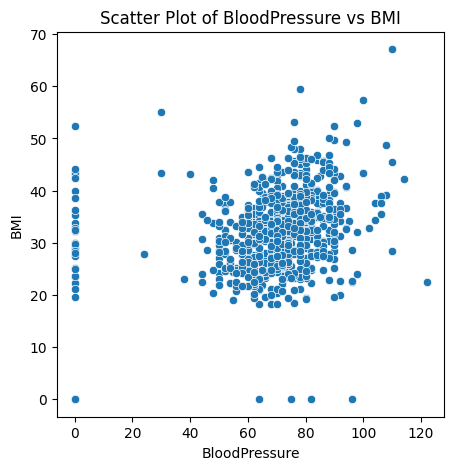

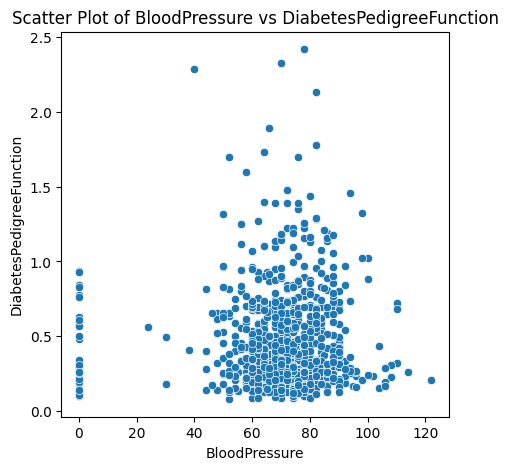

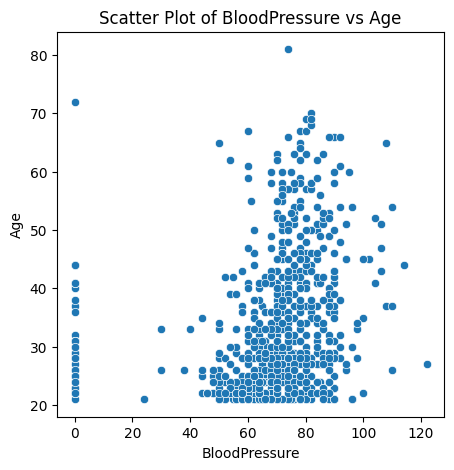

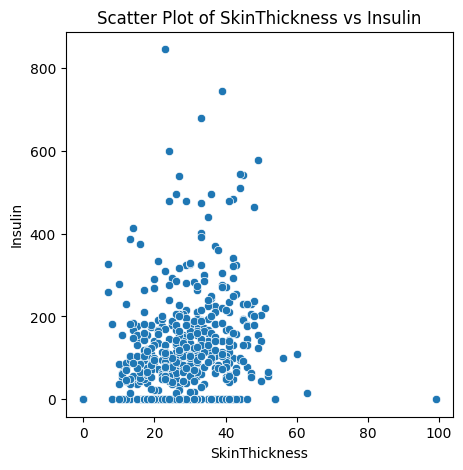

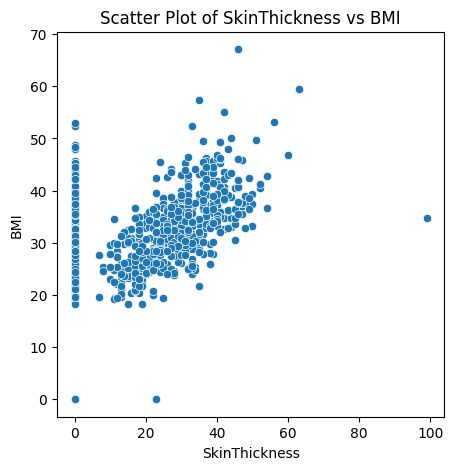

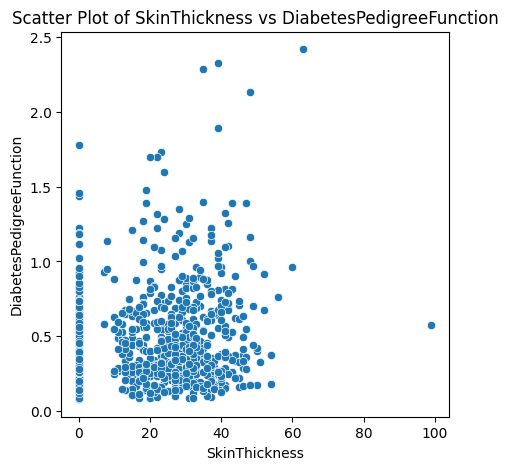

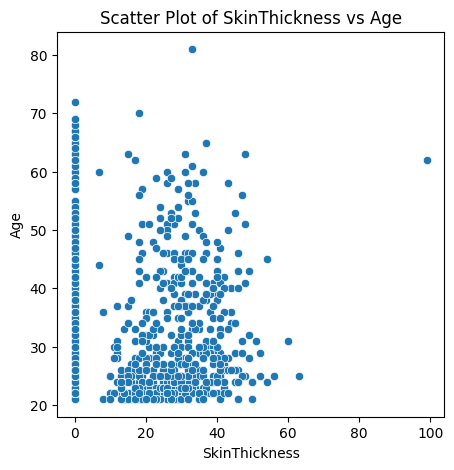

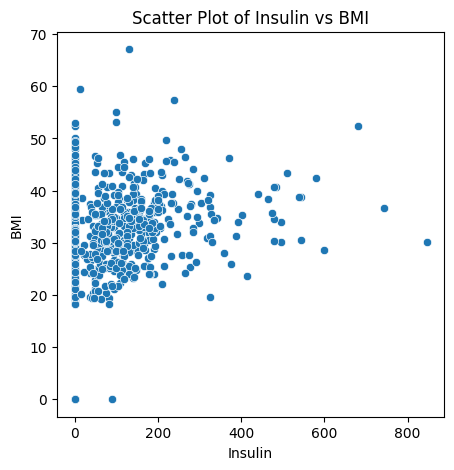

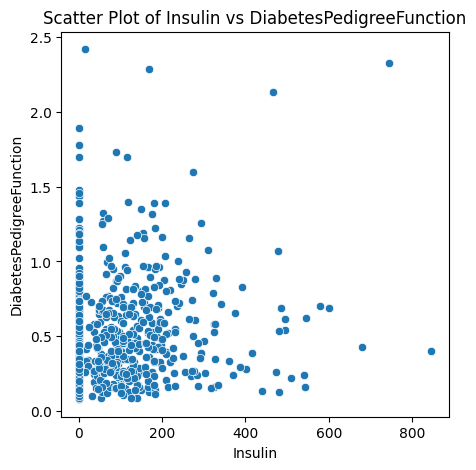

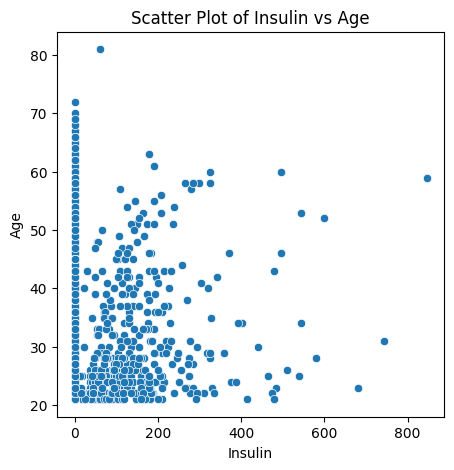

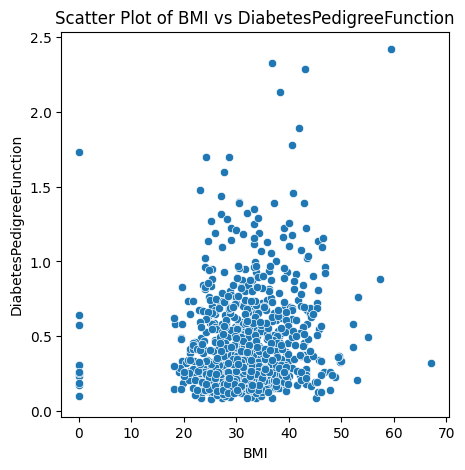

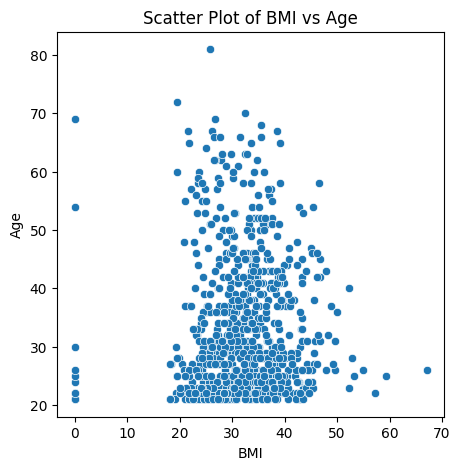

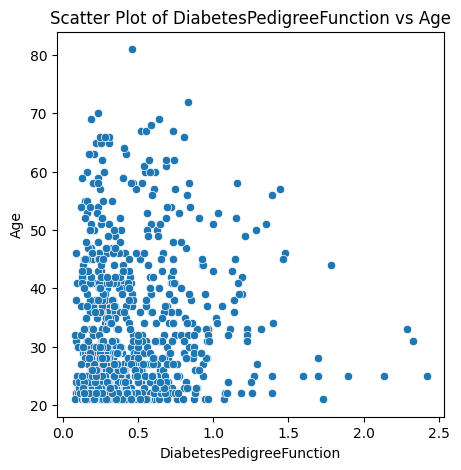

In [82]:
columns = df.columns

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(5,5))
        sns.scatterplot(x=df[columns[i]],y=df[columns[j]])
        plt.title(f'Scatter Plot of {columns[i]} vs {columns[j]}')
        plt.xlabel(f'{columns[i]}')
        plt.ylabel(f'{columns[j]}')
        plt.show()
    

### Pair Plot

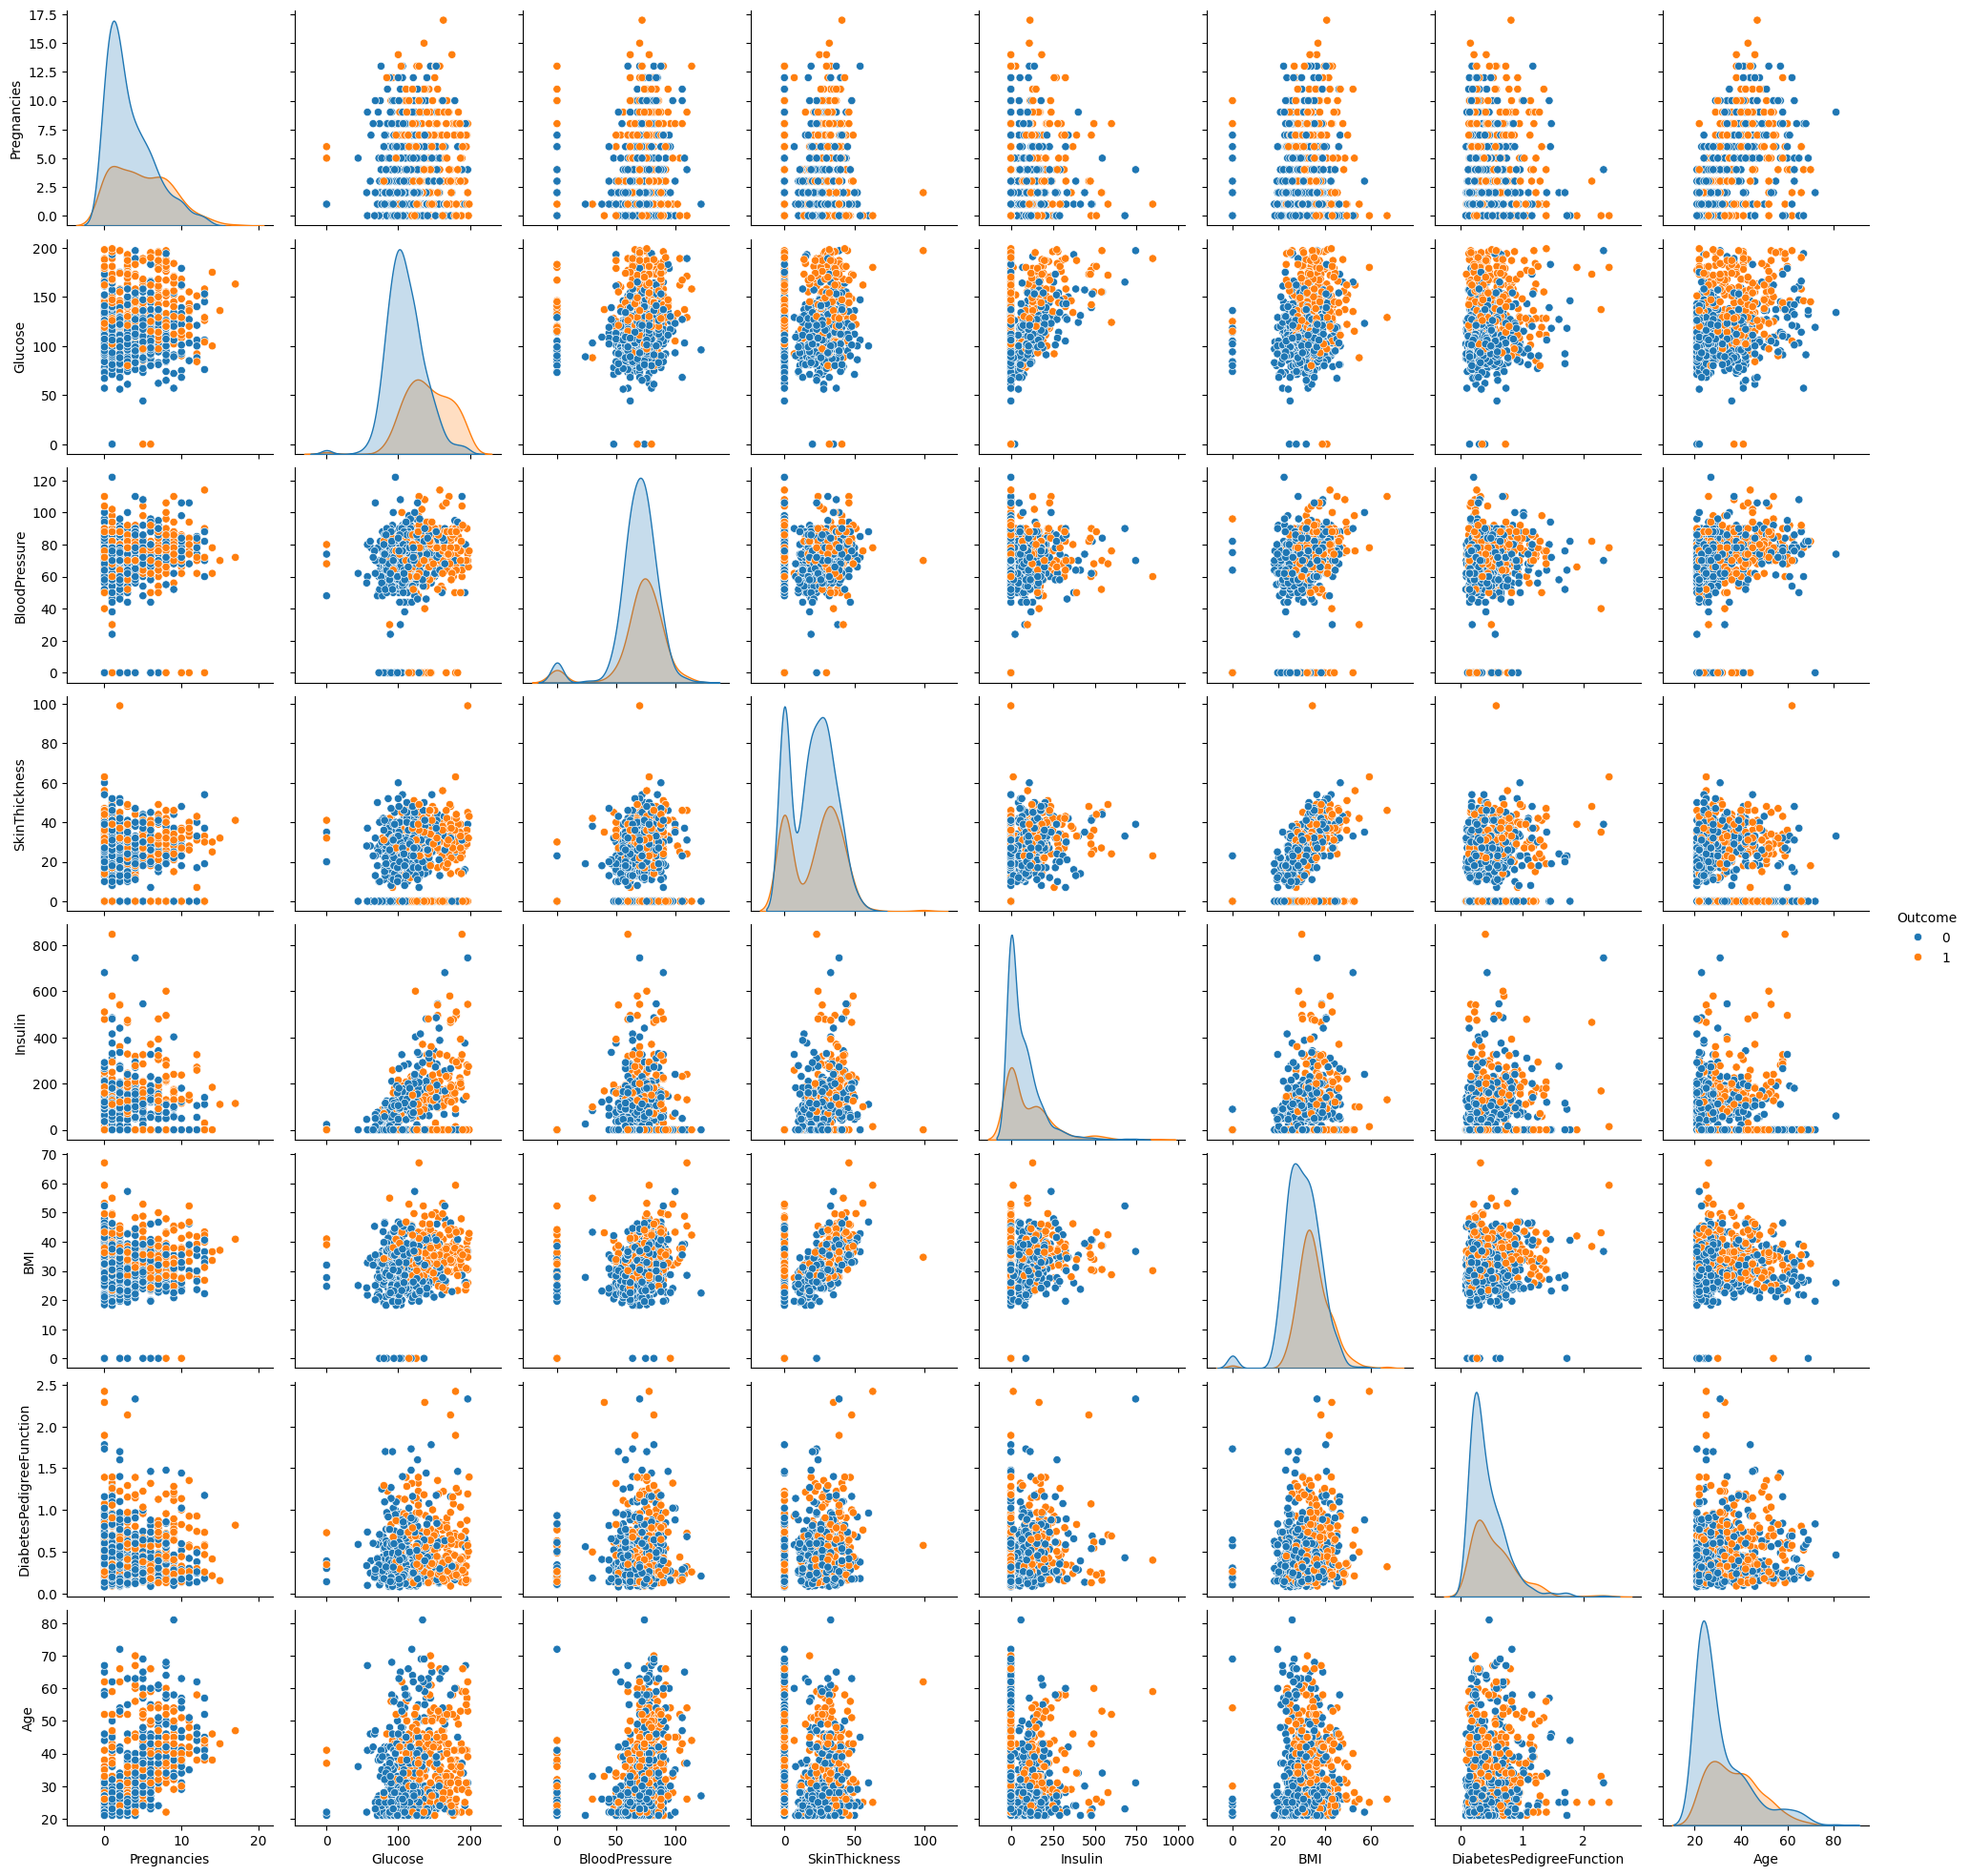

In [83]:
sns.pairplot(data = diabetes_dataset, hue='Outcome')
plt.show()

### Heatmap

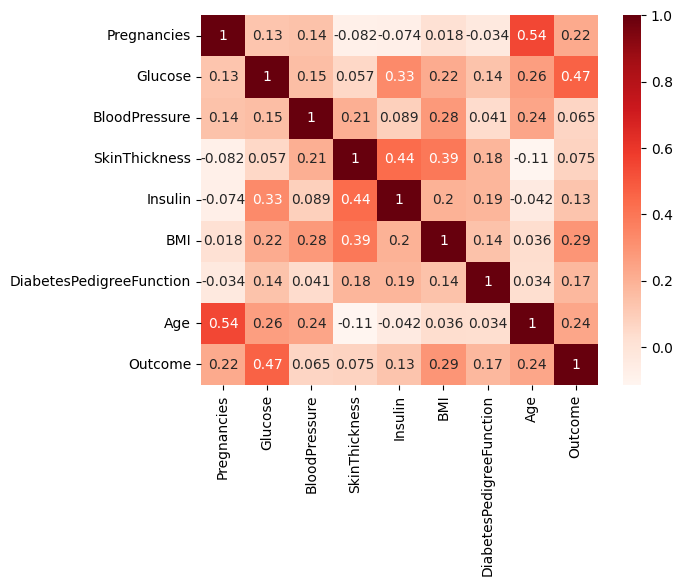

In [84]:
sns.heatmap(diabetes_dataset.corr(),cmap="Reds",annot=True)
plt.show()

# Data Preprocessing

In [85]:
diabetes_dataset_copy = diabetes_dataset.copy(deep=False)

In [86]:
diabetes_dataset_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [87]:
# Since there are zero values in the dataset for features like Glucose, BP, Skin-Thickness, 
# Insulin, BMI which shows these are missing values.
# Replacing zero values with NaN


In [88]:
diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_dataset_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [89]:
# check for the NaN values
diabetes_dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [90]:
# Replacing NaN with mean values
diabetes_dataset_copy["Pregnancies"].fillna(diabetes_dataset_copy["Pregnancies"].mean(),inplace=True);
diabetes_dataset_copy["Glucose"].fillna(diabetes_dataset_copy["Glucose"].mean(),inplace=True)
diabetes_dataset_copy["BloodPressure"].fillna(diabetes_dataset_copy["BloodPressure"].mean(),inplace=True)
diabetes_dataset_copy["SkinThickness"].fillna(diabetes_dataset_copy["SkinThickness"].mean(),inplace=True)
diabetes_dataset_copy["Insulin"].fillna(diabetes_dataset_copy["Insulin"].mean(),inplace=True)
diabetes_dataset_copy["BMI"].fillna(diabetes_dataset_copy["BMI"].mean(),inplace=True)

In [91]:
diabetes_dataset_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [92]:
# getting the statistical summary
diabetes_dataset_copy.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.202592   80.000000  122.00  
SkinThickness              29.153420   32.000000   99.00  
Insulin                   155.548223  155.548223  846.00  
BMI                        32.400000   36.600000   67.10  
DiabetesPedigreeFunction    0.372500    0.626250    2.42  
Age                        29.000000   41.000000   81.00  
Outcome                     0.000000    1.000000    1.00

# Train Test Split

In [93]:
X = diabetes_dataset_copy.drop('Outcome',axis=1)
Y = diabetes_dataset_copy['Outcome']

In [94]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [95]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [96]:
# Splitting data in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [97]:
# Checking the dimensions
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [98]:
print(Y.shape,Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


# Data Standardization

In [99]:
# standardizing data after test train split prevents data leakage
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Data Modelling

### SVM

In [100]:
# Support Vector Classifier
svc = SVC(kernel='linear')
# training the svm classifier
svc.fit(X_train,Y_train)

SVC(kernel='linear')

### Naive Bayes

In [101]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

### Logistic Regression

In [102]:
# Logistic Regression Algorithm
logReg = LogisticRegression()
logReg.fit(X_train,Y_train)

LogisticRegression()

### KNN

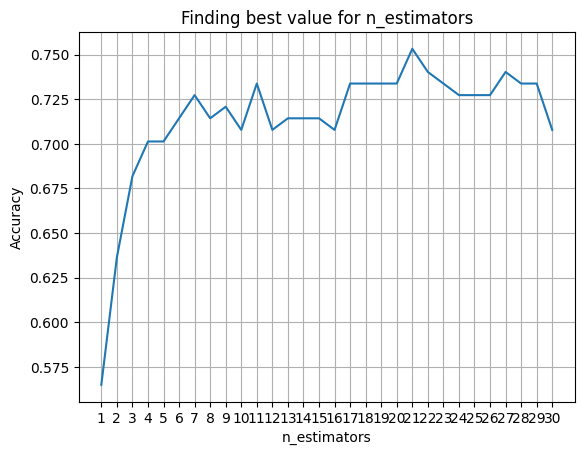

Highest value:  0.7532467532467533


In [103]:
# finding best value for n_estimators

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc._append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [104]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=21)

### Decision Tree

In [105]:
decTree = DecisionTreeClassifier(criterion = 'entropy')
decTree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

### Random Forest

In [106]:
rfc = RandomForestClassifier(n_estimators = 11, criterion = 'entropy')
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11)

# Model Evaluation

In [107]:
# making predictions on test dataset
Y_pred_logReg = logReg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_decTree = decTree.predict(X_test)
Y_pred_rfc = rfc.predict(X_test)

In [108]:
# finding accuracy score for each predictions
accuracy_logReg = accuracy_score(Y_test, Y_pred_logReg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_decTree = accuracy_score(Y_test, Y_pred_decTree)
accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)

In [109]:
# printing accuracy score
print("Logistic Regression: " + str(accuracy_logReg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_decTree * 100))
print("Random Forest: " + str(accuracy_rfc * 100))

Logistic Regression: 74.02597402597402
K Nearest neighbors: 75.32467532467533
Support Vector Classifier: 75.97402597402598
Naive Bayes: 73.37662337662337
Decision tree: 72.07792207792207
Random Forest: 70.12987012987013


In [110]:
# Hence SVC model has the highest accuracy score of 75.97%

In [111]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred_svc)
print(conf_mat)

[[91  9]
 [28 26]]


<Axes: >

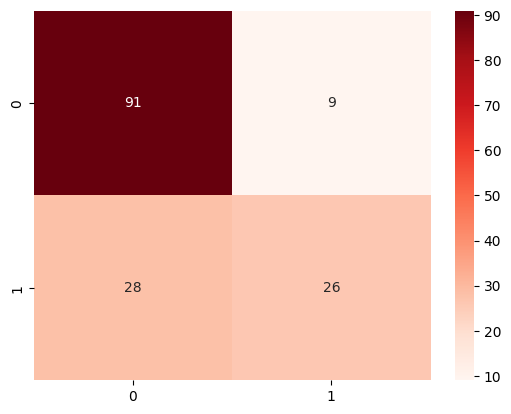

In [112]:
# plot the Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(conf_mat), cmap='Reds', annot=True)

In [113]:
# Classification Report
print(classification_report(Y_test, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       100
           1       0.74      0.48      0.58        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154



# Saving the trained model

In [114]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(svc,open(filename,'wb'))